<a href="https://colab.research.google.com/github/kanaka-22/Mnist/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt

Data Loading and Preprocessing
The MNIST dataset is loaded and preprocessed to prepare it for training and evaluation. The
images are normalized to have pixel values in the range [0, 1], and the labels are one-hot
encoded.

In [2]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Preprocess the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 [==============================] - 0s 0us/step


Model Creation
A basic neural network model with one hidden layer is built for image classification. The model
architecture includes a flattening layer, a hidden dense layer with ReLU activation, and an output
dense layer with softmax activation for multi-class classification.


In [5]:
# Build the Model
model = Sequential(
 [
 Flatten(input_shape=(28,28)),
 Dense(128, activation="relu"),
 Dense(10,activation="softmax"),
 ], name="My_model"
)
model.summary()

Model: "My_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train,
 epochs=10,
 batch_size=32,
 validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.2787 - accuracy: 0.9199 - val_loss: 0.1305 - val_accuracy: 0.9643
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1245 - accuracy: 0.9629 - val_loss: 0.1027 - val_accuracy: 0.9698
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0840 - accuracy: 0.9745 - val_loss: 0.0855 - val_accuracy: 0.9760
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0627 - accuracy: 0.9808 - val_loss: 0.0798 - val_accuracy: 0.9763
Epoch 5/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0486 - accuracy: 0.9850 - val_loss: 0.0839 - val_accuracy: 0.9783
Epoch 6/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0391 - accuracy: 0.9879 - val_loss: 0.0780 - val_accuracy: 0.9792
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0307 - accuracy: 0.9909 - val_loss: 0.0891 - val_accurac

In [8]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")


313/313 [==============================] - 1s 2ms/step - loss: 0.0881 - accuracy: 0.9765
Test accuracy: 97.65%


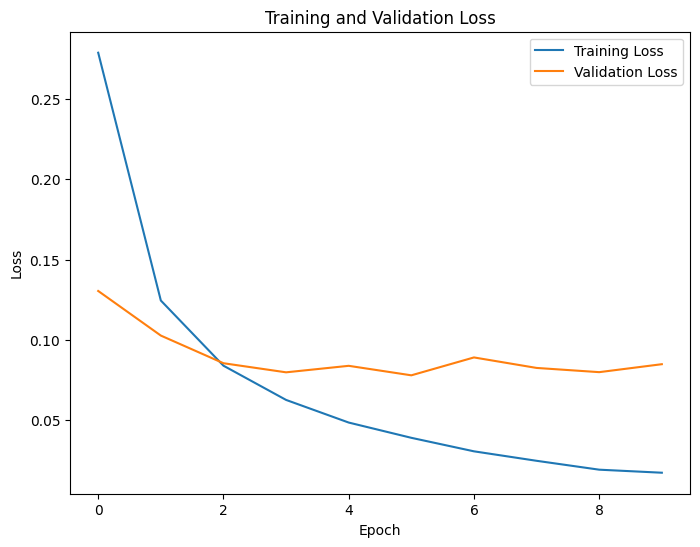

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

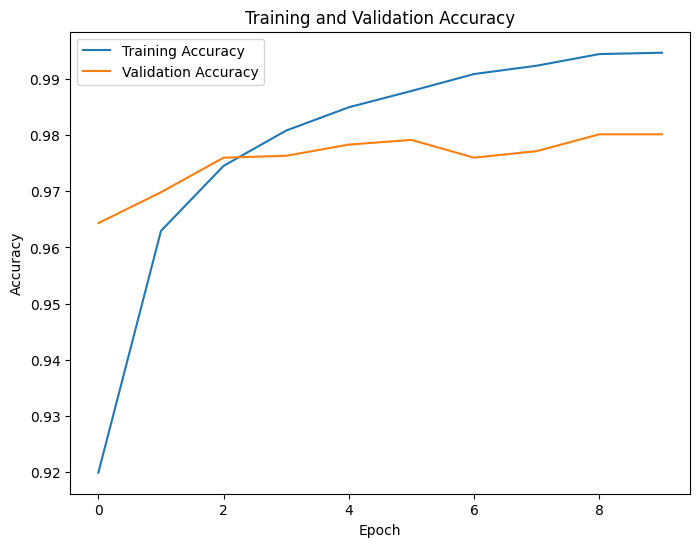

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 50ms/step


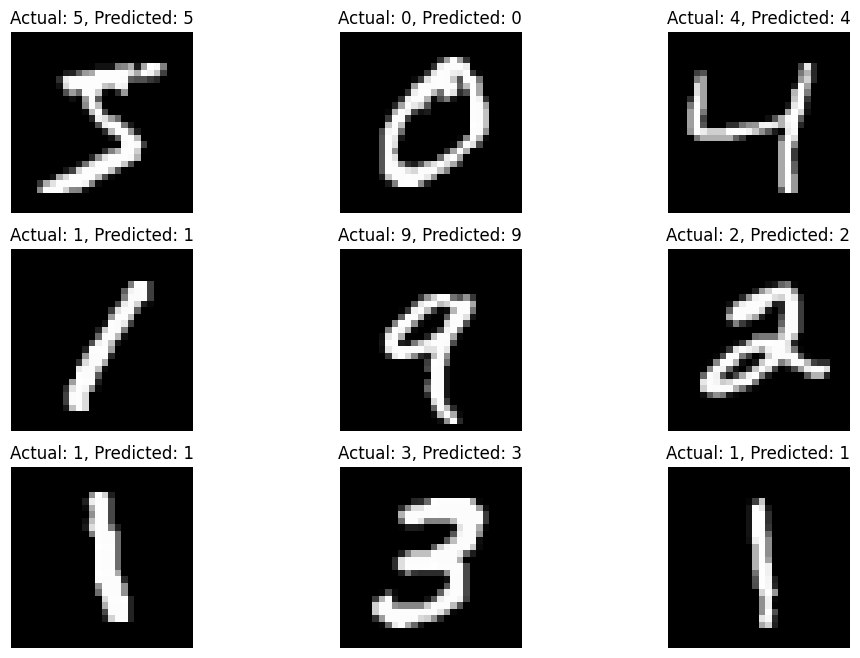

In [12]:
num_rows, num_cols = 3, 3
# Display six example images from the dataset with predictions
plt.figure(figsize=(12, 8))
for i in range(num_rows * num_cols):
 plt.subplot(num_rows, num_cols, i + 1)
 image = x_train[i].reshape(1, 28, 28)
 prediction = model.predict(image)
 predicted_class = np.argmax(prediction)
 plt.imshow(x_train[i], cmap='gray')
 plt.title(f"Actual: {np.argmax(y_train[i])}, Predicted: {predicted_class}")
 plt.axis('off')
plt.show()